# Generador de la frontera estocástica

## Importación de bibliotecas y módulos

In [1]:
from IPython import display
import ipywidgets
import numpy as np
from numba import jit
import seaborn as sns
import matplotlib.pyplot as plt

### Opciones de graficación
Estética de las gráficas

In [2]:
sns.set_style("darkgrid")                  # Malla blanca
sns.set_context("paper", font_scale = 1.5)  # Tamaño de fuente en el contexto de un "paper"

## Función generadora

In [3]:
@jit(nopython = True)
def ruido(st, base, desfase):
    techo = base + 2 * desfase
    promedio = base + desfase
    desviacion = desfase / 4.0
    # Construccion
    epsilon = np.random.normal(
        loc = promedio,
        scale = desviacion,
        size = st)
    # Correccion de valores
    epsilon[epsilon > techo] = techo
    epsilon[epsilon < base] = base
    # Primer valor
    epsilon[0] = promedio
    
    return epsilon

## Parámetros

In [4]:
nr = 100
base = 1.0
desfase = 0.1

Lt = 1.0
nt = 100_001
t = np.linspace(0, Lt, nt)
dt = t[1] - t[0]
dt

1e-05

## Inicialización

In [5]:
frontera = np.empty((nr, nt))

## Proceso principal

In [6]:
# Barra de progreso
progreso = ipywidgets.FloatProgress(
    value = 0,
    min = 0,
    max = nr, 
    description = 'Progreso:')
display.display(progreso)

progreso.value = 0
for r in range(nr):
    frontera[r] = ruido(nt, base, desfase)
    progreso.value = r + 1

FloatProgress(value=0.0, description='Progreso:')

## Distribución

### Analítica

In [7]:
x = np.linspace(frontera.min(), frontera.max(), 10001)
mu = frontera.mean()
sigma = frontera.std()
dist_teorica =(1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- ((x - mu)**2) / (2 * sigma**2))
print("Promedio: ", mu)
print("Var. Est.: ", sigma)

Promedio:  1.100015550805801
Var. Est.:  0.024988203472109508


### Gráfica

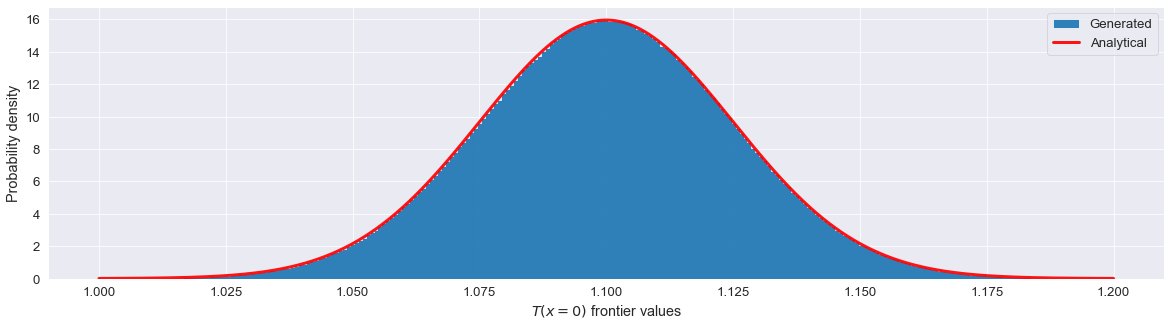

In [8]:
plt.figure(figsize = (20, 5))
plt.ylabel("Probability density")
plt.xlabel("$T(x = 0)$ frontier values")
plt.hist(frontera.ravel(), bins = 255, density = True, histtype = "stepfilled", alpha = 0.92, label = "Generated")
plt.plot(x, dist_teorica, lw = 3.0, c = "r", alpha = 0.92, label = "Analytical")
plt.legend(loc = "best")
plt.savefig("grafica_frontera/distribucion_frontera.pdf", bbox_inches = "tight")
plt.show()

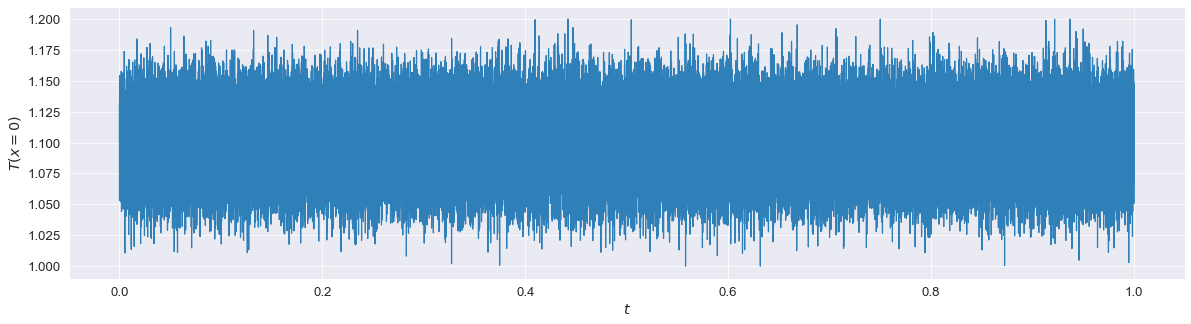

In [9]:
plt.figure(figsize = (20, 5))
plt.ylabel("$T(x = 0)$")
plt.xlabel("$t$")
plt.plot(t, frontera[0], alpha = 0.92)
plt.savefig("grafica_frontera/serie_frontera.pdf", bbox_inches = "tight")
plt.show()

## Archivo

In [10]:
np.savetxt("datos_frontera/fronteras.csv", frontera)